In [1]:
import autoroot
import autorootcwd

import torch
from model_dcgan import Generator, Discriminator
from view import view_tensor_image, view_history

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_checkpoint(checkpoint_path, G, D):
        checkpoint = torch.load(checkpoint_path, map_location=device)
        G.load_state_dict(checkpoint['g_state_dict'])
        D.load_state_dict(checkpoint['d_state_dict'])
        start_epoch = checkpoint['epoch'] + 1
        best_g_loss = checkpoint['best_g_loss']
        best_d_loss = checkpoint['best_d_loss']
        history = checkpoint['history']
        return G, D, start_epoch, best_g_loss, best_d_loss, history

In [11]:
# Load model from checkpoints/latest.pth
image_size = (64, 64)
channels = 3
latent_dim = 128

D = Discriminator(image_size=image_size, channels=channels).to(device)
G = Generator(latent_dim=latent_dim, image_size=image_size, channels=channels).to(device)

G, D, start_epoch, best_g_loss, best_d_loss, history = load_checkpoint('1400 epochs/checkpoints/checkpoints/best.pth', G, D)

Epoch 309


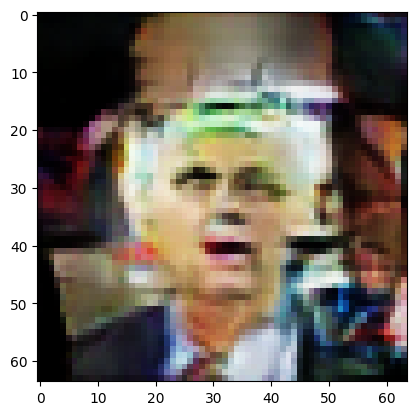

In [22]:
noise = torch.randn(1, latent_dim).to(device)
fake_image = G(noise)
print("Epoch", start_epoch)
view_tensor_image(fake_image.squeeze(), black_white=(channels == 1), normalized=True)

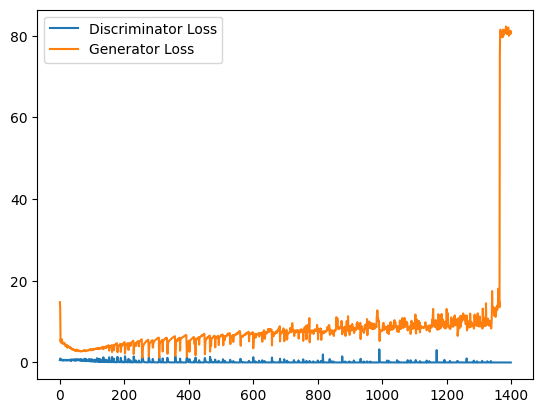

In [5]:
view_history(history)

In [6]:
print(G)
print(D)

Generator(
  (model): Sequential(
    (0): Block(
      (conv): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): Block(
      (conv): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (2): Block(
      (conv): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (3): Block(
      (conv): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (4): ConvTranspose2d(64,

Files already downloaded and verified


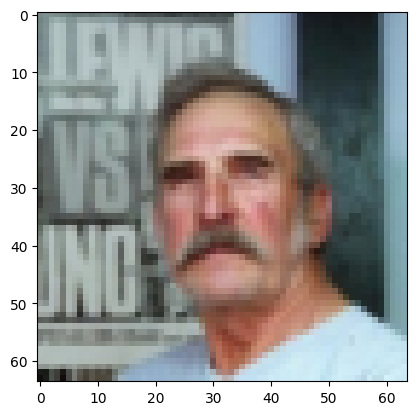

Confidence: 100.00 %


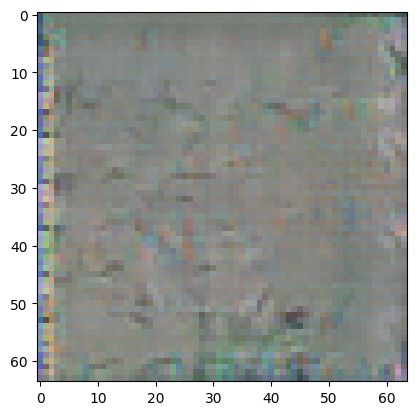

Confidence: 0.00 %


In [7]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import v2
import matplotlib.pyplot as plt
import numpy as np

image_size = 64

transform = v2.Compose([
    v2.Resize((image_size, image_size)),
    v2.CenterCrop(image_size),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
])

data_dir = './data'
dataset = datasets.LFWPeople(root=data_dir, split='train', transform=transform, download=True)

index = np.random.randint(0, len(dataset))
image = dataset[index][0].to(device)
view_tensor_image(image)
print(f"Confidence: {D(image.unsqueeze(0)).item()*100:.2f} %")
noise = torch.randn(1, latent_dim).to(device)
fake_image = G(noise)
view_tensor_image(fake_image.squeeze(), black_white=(channels == 1), normalized=True)
print(f"Confidence: {D(fake_image).item()*100:.2f} %")